In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
import random
import imblearn
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import Normalizer,StandardScaler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from statistics import Counter
import umap.umap_ as umap
import matplotlib.pyplot as plt
from scipy.stats import uniform
from sklearn.metrics import classification_report

In [72]:
df = pd.read_csv("breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [73]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [74]:
##train_test
split_amount = 0.3
search_implementation = "Grid" ##Defining the parameter tunign process. Alternatively "Random". Select to choose search method


#initializing some parameters
random_seed = 53
n_iterations = 50 ##number of iterations for randomized search, if applicable.
verbosity = 5
n_jobs = 1
cross_validation_folds = 10
scoring_metric = "roc_auc"

##convert diagnosis to binary
diagnosis_bin = pd.get_dummies(df,columns=["diagnosis"])["diagnosis_M"]
df["diagnosis"] = diagnosis_bin 


X = df.loc[:,"radius_mean":"fractal_dimension_worst"] ##ignoring id varible
column_names = list(X.columns) ##extrating column names
y = np.array(pd.DataFrame(df.loc[:,"diagnosis"])) ##setting response variable
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=split_amount)


In [93]:
#pipeline created

pipe = make_pipeline(
        BorderlineSMOTE(),
        Normalizer(),
        umap.UMAP(),
        SVC()
)

#pipe.fit(X_train, y_train)
print(pipe)


Pipeline(steps=[('borderlinesmote', BorderlineSMOTE()),
                ('normalizer', Normalizer()), ('umap', UMAP()),
                ('svc', SVC())])


In [75]:



if search_implementation == "Random":
    unif_comp = [round(np.random.uniform(2,25)) for i in range(100)]
    search_space = {'svc__C':uniform(loc=0,scale=1),
                    'umap__n_components':unif_comp}

    CV_mod =  RandomizedSearchCV(estimator= pipe,
                        param_distributions=search_space,
                        scoring=scoring_metric,
                        n_iter = n_iterations,
                        cv=cross_validation_folds,
                        random_state=random_seed,
                        refit='AUC',
                        return_train_score=False,
                        verbose=verbosity,
                        n_jobs=n_jobs
    )

elif search_implementation =='Grid':
    params = {'svc__C':[i/100 for i in range(10,100,10)],
          'svc__gamma':["scale","auto"],
          'umap__n_components':range(10,25,5),
         'umap__n_neighbors':range(5,15,3)}
 
    CV_mod =  GridSearchCV(estimator= pipe,
                        param_grid=params,
                        scoring=scoring_metric,
                        cv=cross_validation_folds,
                        refit='AUC',
                        return_train_score=False,
                        verbose=verbosity,
                        n_jobs=n_jobs
    )

CV_mod.fit(X_train,y_train)
results = CV_mod.cv_results_

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


C:\Users\aje98\AppData\Roaming\Python\Python38\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [94]:
print(CV_mod.best_estimator_)

Pipeline(steps=[('borderlinesmote', BorderlineSMOTE(random_state=51)),
                ('normalizer', Normalizer()),
                ('umap',
                 UMAP(min_dist=0.3, n_components=15, n_neighbors=8, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})),
                ('svc', SVC(C=0.1, random_state=51))])


In [95]:
##outputting means and standard deviations
means = results['mean_test_score']
stds  = results['std_test_score']
for mean, std, params in zip(means, stds, results['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.926 (+/-0.091) for {'svc__C': 0.1, 'svc__gamma': 'scale', 'umap__n_components': 10, 'umap__n_neighbors': 5}
0.924 (+/-0.081) for {'svc__C': 0.1, 'svc__gamma': 'scale', 'umap__n_components': 10, 'umap__n_neighbors': 8}
0.933 (+/-0.094) for {'svc__C': 0.1, 'svc__gamma': 'scale', 'umap__n_components': 10, 'umap__n_neighbors': 11}
0.922 (+/-0.081) for {'svc__C': 0.1, 'svc__gamma': 'scale', 'umap__n_components': 10, 'umap__n_neighbors': 14}
0.942 (+/-0.073) for {'svc__C': 0.1, 'svc__gamma': 'scale', 'umap__n_components': 15, 'umap__n_neighbors': 5}
0.945 (+/-0.076) for {'svc__C': 0.1, 'svc__gamma': 'scale', 'umap__n_components': 15, 'umap__n_neighbors': 8}
0.928 (+/-0.048) for {'svc__C': 0.1, 'svc__gamma': 'scale', 'umap__n_components': 15, 'umap__n_neighbors': 11}
0.921 (+/-0.083) for {'svc__C': 0.1, 'svc__gamma': 'scale', 'umap__n_components': 15, 'umap__n_neighbors': 14}
0.943 (+/-0.085) for {'svc__C': 0.1, 'svc__gamma': 'scale', 'umap__n_components': 20, 'umap__n_neighbors': 5}
0.923 

In [97]:
def plot_output(results,param,figsize=(10, 10)):
    plt.figure(figsize=figsize)
    plt.title(f" evaluating {param}",
              fontsize=16)
    plt.xlabel("k")
    plt.ylabel("AUC")
    ax = plt.gca()
    # adjust these according to your accuracy results and range values.
    #ax.set_xlim(0, 700)
    ax.set_ylim(0.8, 1)

    # Get the regular numpy array from the MaskedArray
    try:
        X_axis = np.array(results[param].data, dtype=float)
    except ValueError:
        X_axis = np.array(results[param].data, dtype=str)

        
    scoring = ['roc_auc']
    
    sample_score_mean = results['mean_test_score']
    sample_score_std = results['std_test_score']
    
    #ax.fill_between(X_axis, sample_score_mean - sample_score_std,sample_score_mean + sample_score_std)
    ax.plot(X_axis, sample_score_mean)

    best_index = np.nonzero(results['rank_test_score'] == 1)[0][0]
    best_score = results['mean_test_score'][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f with k=%s" % (best_score, X_axis[best_index]),
                (X_axis[best_index], best_score + 0.005))

    plt.legend(loc="best")
    plt.grid(False)
    plt.show()

No handles with labels found to put in legend.



Evaluating GridSearchCV



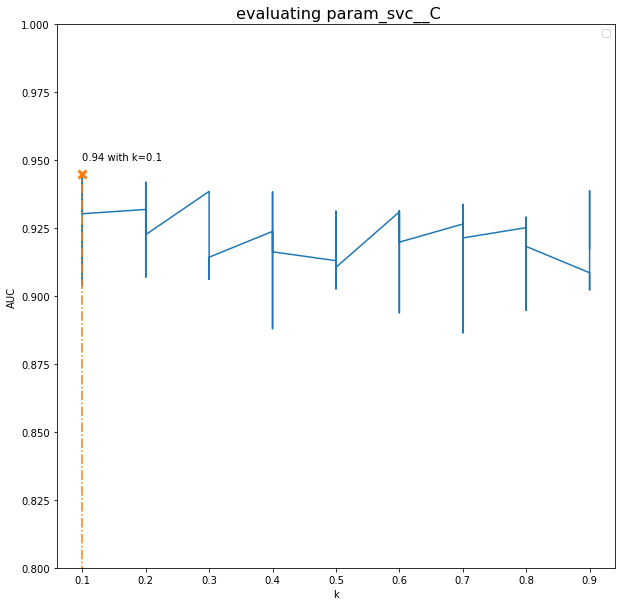

No handles with labels found to put in legend.


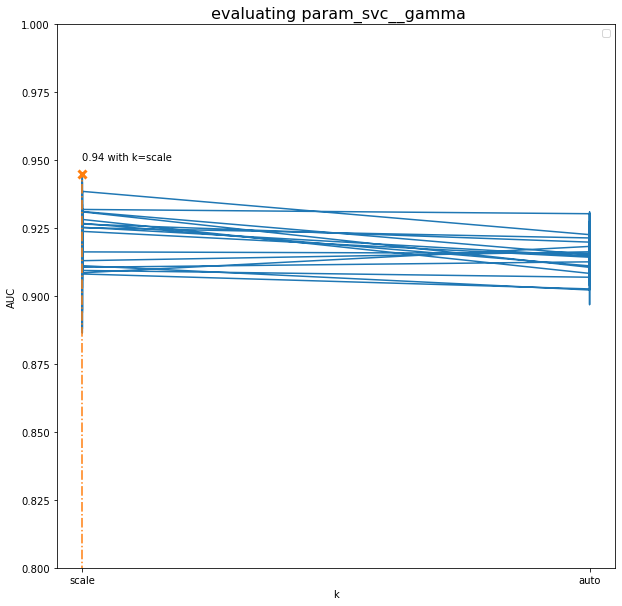

No handles with labels found to put in legend.


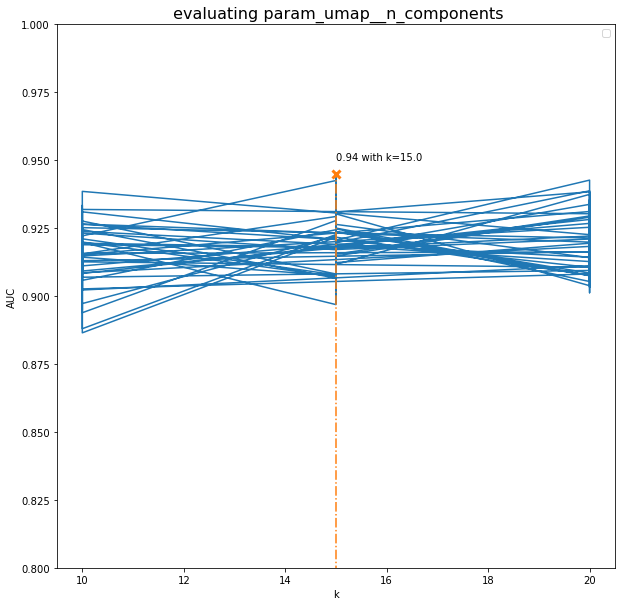

No handles with labels found to put in legend.


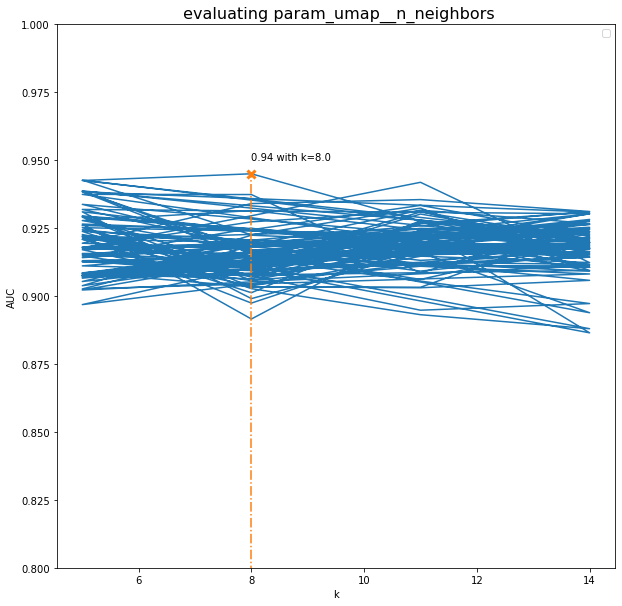

In [98]:
##plotting the parameter tuning results

if search_implementation == "Grid":
    print("==========================")
    print("\nEvaluating GridSearchCV\n")
    print("==========================")
    for param in ['param_svc__C', 'param_svc__gamma', 'param_umap__n_components', 'param_umap__n_neighbors']:
        plot_output(results,param)

elif search_implementation == "Random":
    print("==========================")  
    print("\nEvaluating RandomzedSearchCV \n")
    print("==========================")
    for param in ['param_svc__C', 'param_umap__n_components']:
        plot_output(results2,param)


Best score: 0.9449677655677654


              precision    recall  f1-score   support

           0       0.96      0.83      0.89       104
           1       0.78      0.94      0.85        67

    accuracy                           0.87       171
   macro avg       0.87      0.88      0.87       171
weighted avg       0.89      0.87      0.87       171




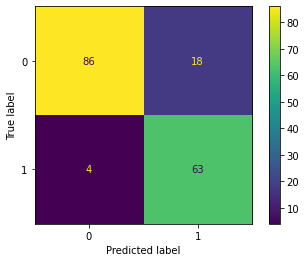

In [101]:

print("=============================\n")
print(f"Best score: {CV_mod.best_score_}\n")
print("=============================\n")

##returning the best model
y_true, y_pred = y_test, CV_mod.best_estimator_.predict(X_test)

print(classification_report(y_true, y_pred))

print("=============================\n")

cm = confusion_matrix(y_test, y_pred)
out = ConfusionMatrixDisplay(confusion_matrix=cm)
out.plot()
plt.show()